In [58]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

# Reading and Understanding the Data and Merging Data

In [59]:
# Importing all datasets
churn_data = pd.read_csv('../input/logistic-regression-use-case-churn/churn_data.csv')
churn_data.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
customer_data = pd.read_csv("../input/logistic-regression-use-case-churn/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [61]:
internet_data = pd.read_csv("../input/logistic-regression-use-case-churn/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [62]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Final Data

In [63]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [64]:
print(telecom.describe())
print(telecom.info())

            tenure  MonthlyCharges  SeniorCitizen
count  7043.000000     7043.000000    7043.000000
mean     32.371149       64.761692       0.162147
std      24.559481       30.090047       0.368612
min       0.000000       18.250000       0.000000
25%       9.000000       35.500000       0.000000
50%      29.000000       70.350000       0.000000
75%      55.000000       89.850000       0.000000
max      72.000000      118.750000       1.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges   

### Data Cleaning

In [65]:
telecom.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

#### Total Charges

In [66]:
telecom['TotalCharges'].describe()
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

##### Total Charges will be related to Monthly Charges.
##### We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [67]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()
print('value',value)
value=value*telecom['MonthlyCharges']
value

value 28.8318215219303


0        860.629872
1       1641.972236
2       1552.593589
3       1219.586050
4       2038.409782
           ...     
7038    2444.938465
7039    2975.443981
7040     853.421917
7041    2145.087521
7042    3046.081944
Name: MonthlyCharges, Length: 7043, dtype: float64

In [68]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

## EXploratory Data Analytics
### Univariate Analysis
#### Churn (Target Variable)

In [69]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

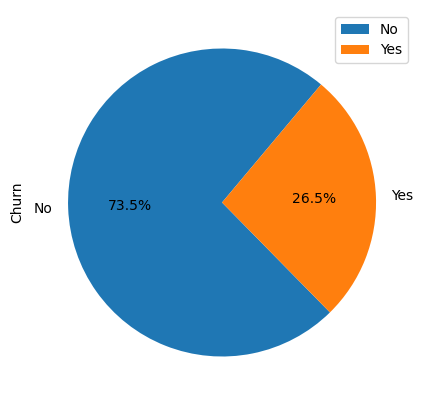

In [70]:
pie_churn = pd.DataFrame(telecom['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50)
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

##### We have a data with 27% churn rate.

### Tenure
##### The time for which a customer has been using the service.

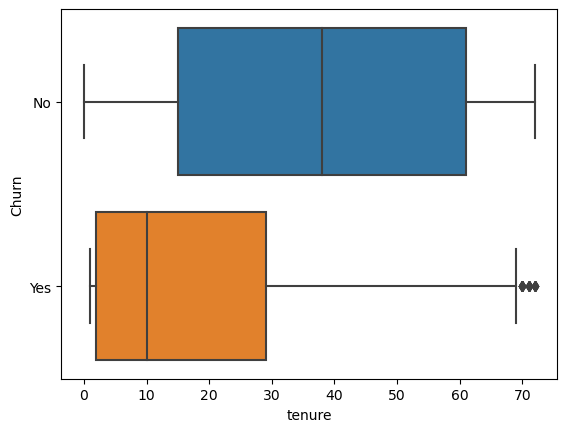

In [71]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

##### Customer with more tenure tends to churn less.

In [72]:
print(telecom.columns)

df1=telecom['PhoneService'].describe()
print(df1)
#print(telecom[['PhoneService','Churn']])
print(telecom[telecom['PhoneService']=='Yes']['Churn'].value_counts().values)
print(telecom[telecom['PhoneService']=='Yes']['Churn'].value_counts().index)
n,y=0,0
for i in range(len(telecom['PhoneService'])):
    if telecom['PhoneService'][i] =='Yes':
        if telecom['Churn'][i]=='Yes':
            y+=1
        else:
            n+=1
print('y',y,'n',n)
print((telecom['Churn'][telecom['PhoneService']=='Yes']).value_counts())
print(telecom['Churn'].value_counts())

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object
[4662 1699]
Index(['No', 'Yes'], dtype='object')
y 1699 n 4662
No     4662
Yes    1699
Name: Churn, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64


### Phone Service
##### Whether a customer has a landline phone service along with the internet service.

{'No': 4662, 'Yes': 1699}
{'No': 512, 'Yes': 170}


Text(0.5, 1.0, 'PhoneService_no')

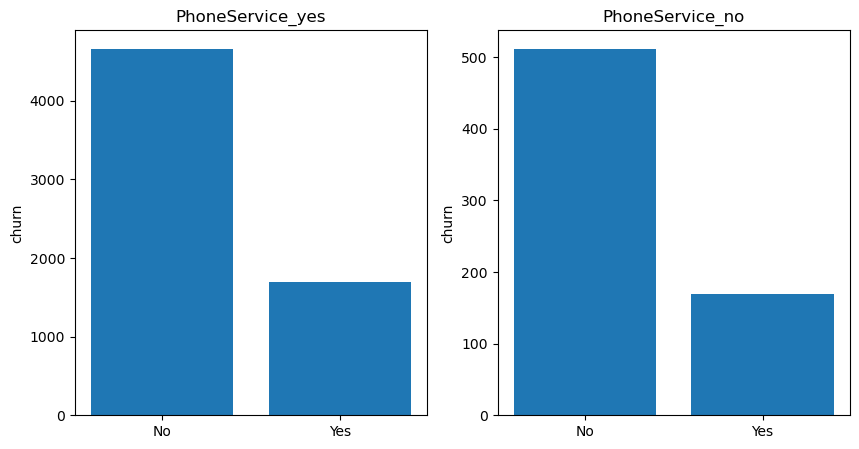

In [73]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)

t=telecom[telecom['PhoneService']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PhoneService_yes')

fig.add_subplot(1,2,2)
t=telecom[telecom['PhoneService']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PhoneService_no')

##### Opting for phone service does not have a significant impact on churn rate.

### PaperlessBilling

{'No': 2771, 'Yes': 1400}
{'No': 2403, 'Yes': 469}


Text(0.5, 1.0, 'PaperlessBilling_no')

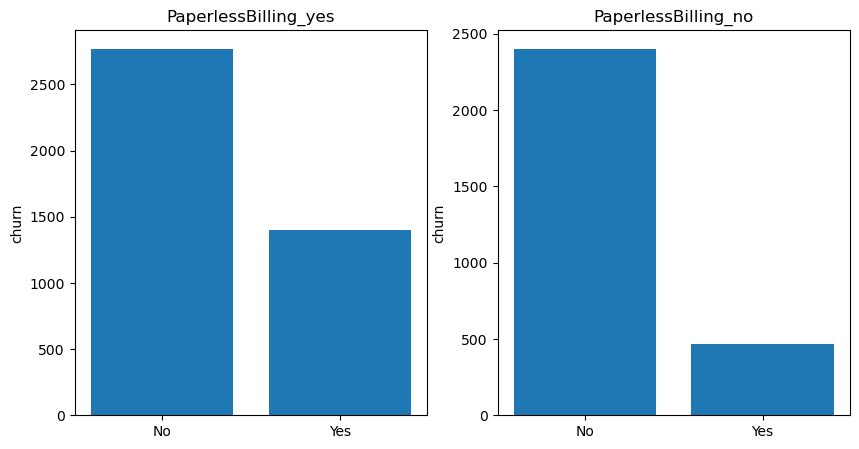

In [74]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(1,2,1)

t=telecom[telecom['PaperlessBilling']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PaperlessBilling_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['PaperlessBilling']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PaperlessBilling_no')


##### Churn Rate is higher for the customers who opted for paperless billing.

### Contract 

{'No': 2220, 'Yes': 1655}
{'No': 1307, 'Yes': 166}
{'No': 1647, 'Yes': 48}


Text(0.5, 1.0, 'Contract_Two year')

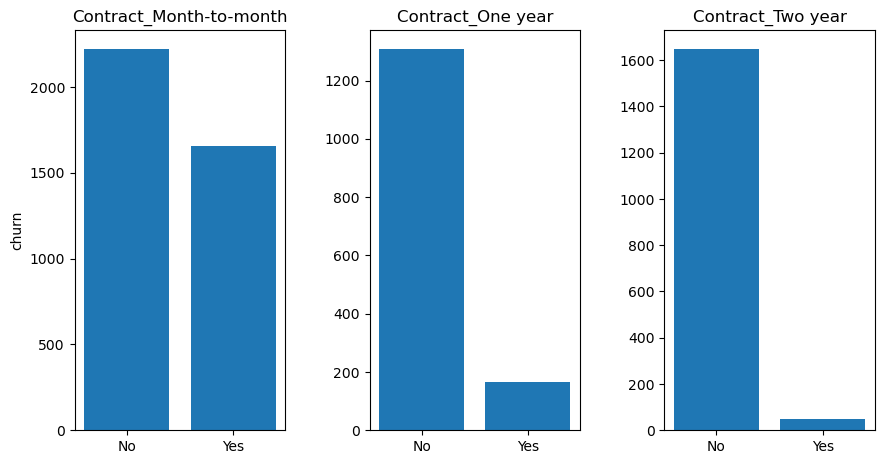

In [75]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,3,1)

t=telecom[telecom['Contract']=='Month-to-month']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('Contract_Month-to-month')

fig.add_subplot(1,3,2)
t=telecom[telecom['Contract']=='One year']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))

plt.title('Contract_One year')

fig.add_subplot(1,3,3)
t=telecom[telecom['Contract']=='Two year']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.title('Contract_Two year')




##### Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

### PaymentMethod

In [76]:
print(telecom['PaymentMethod'].describe())
print(telecom['PaymentMethod'].unique())

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


{'No': 1294, 'Yes': 1071}
{'No': 1304, 'Yes': 308}
{'No': 1286, 'Yes': 258}
{'No': 1290, 'Yes': 232}


Text(0.5, 1.0, 'PaymentMethod_Credit card (automatic)')

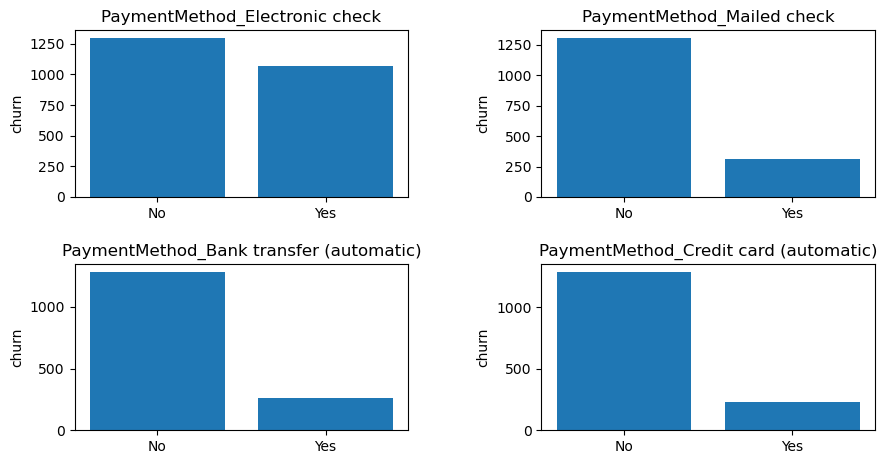

In [77]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(2,2,1)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

t=telecom[telecom['PaymentMethod']=='Electronic check']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PaymentMethod_Electronic check')

fig1.add_subplot(2,2,2)
t=telecom[telecom['PaymentMethod']=='Mailed check']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PaymentMethod_Mailed check')


fig1.add_subplot(2,2,3)
t=telecom[telecom['PaymentMethod']=="Bank transfer (automatic)"]['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PaymentMethod_Bank transfer (automatic)')
          
fig1.add_subplot(2,2,4)
t=telecom[telecom['PaymentMethod']=="Credit card (automatic)"]['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('PaymentMethod_Credit card (automatic)')


##### Customers with Electronic Check tends to churn more than other payment methods.

### Monthly Charges

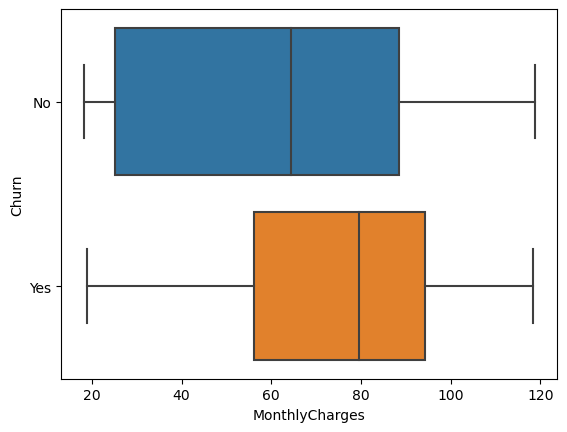

In [78]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

#### Median monthly charges are higher for customers who have churned.

### TotalCharges

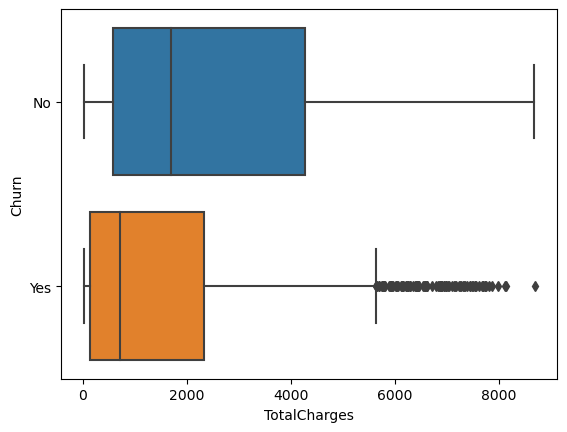

In [79]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

#### Median Total charges are low for customers who have churned.

### Gender

{'No': 2625, 'Yes': 930}
{'No': 2549, 'Yes': 939}


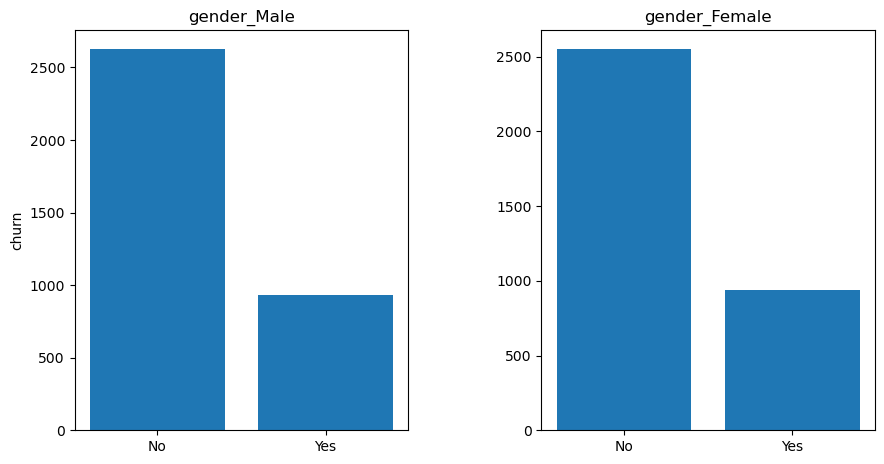

In [80]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['gender']=='Male']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('gender_Male')

fig1.add_subplot(1,2,2)
t=telecom[telecom['gender']=='Female']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))

plt.title('gender_Female')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

#### There is no effect of Gender on Churn.

### SeniorCitizen

{'No': 4508, 'Yes': 1393}
{'No': 666, 'Yes': 476}


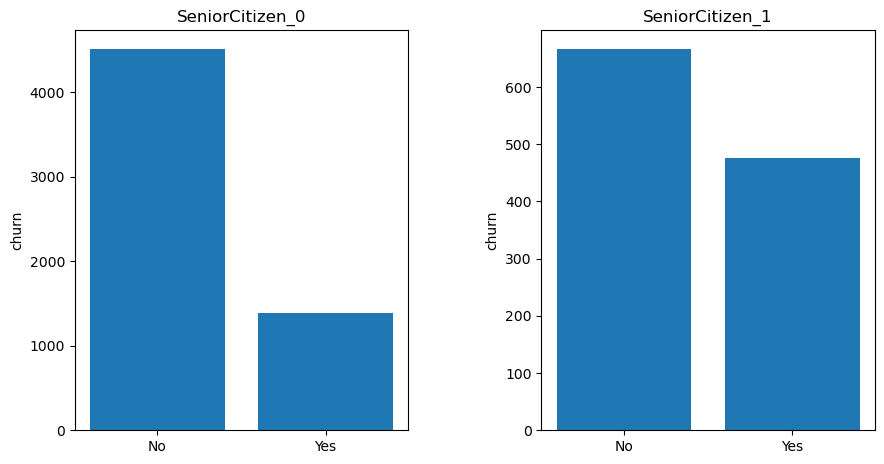

In [81]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(1,2,1)

t=telecom[telecom['SeniorCitizen']==0]['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('SeniorCitizen_0')

fig1.add_subplot(1,2,2)
t=telecom[telecom['SeniorCitizen']==1]['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('SeniorCitizen_1')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


#### Senior Citizens tends to churn more.

### Partner

{'No': 2733, 'Yes': 669}
{'No': 2441, 'Yes': 1200}


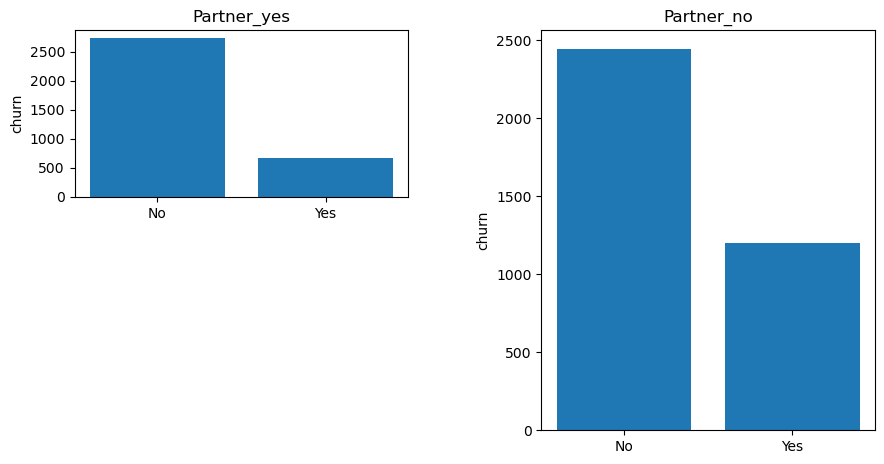

In [82]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(2,2,1)
t=telecom[telecom['Partner']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('Partner_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['Partner']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('Partner_no')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

### Dependents

{'No': 1784, 'Yes': 326}
{'No': 3390, 'Yes': 1543}


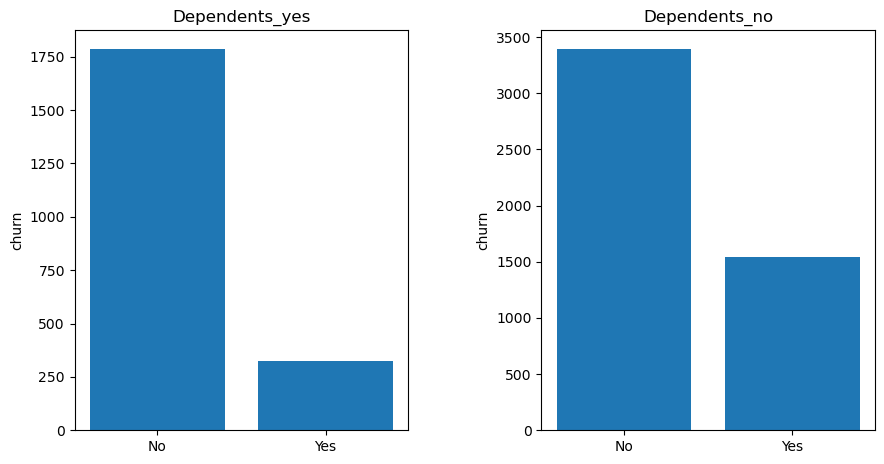

In [83]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['Dependents']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('Dependents_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['Dependents']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('Dependents_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

#### Customers with no dependents tends to churn more.

### Multiple Lines

{'No': 2121, 'Yes': 850}
{'No': 2541, 'Yes': 849}


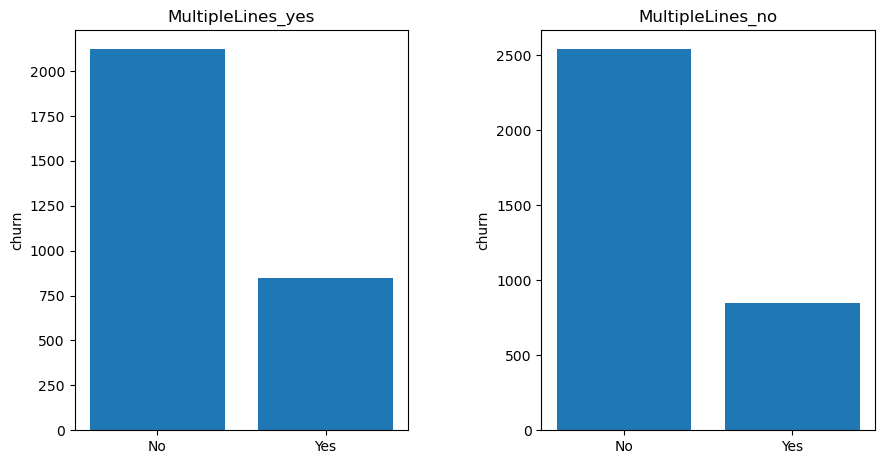

In [84]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['MultipleLines']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('MultipleLines_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['MultipleLines']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('MultipleLines_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

#### Multiple lines of internet connectivity doesn't effect churn that much.

### Internet Service

{'No': 1799, 'Yes': 1297}
{'No': 1962, 'Yes': 459}
{'No': 1413, 'Yes': 113}


Text(0.5, 1.0, 'InternetService No')

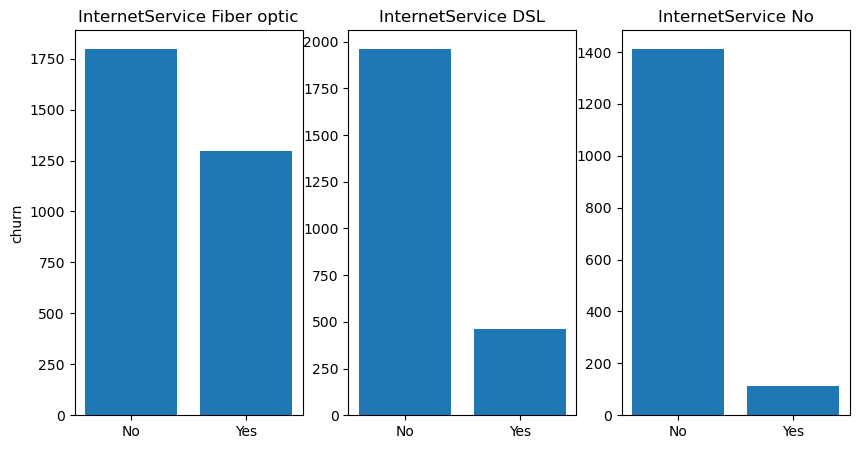

In [85]:
fig1 = plt.figure(figsize = (10,5))
fig1.add_subplot(1,3,1)


t=telecom[telecom['InternetService']=='Fiber optic']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('InternetService Fiber optic')

fig1.add_subplot(1,3,2)
t=telecom[telecom['InternetService']=='DSL']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))

plt.title('InternetService DSL')


fig1.add_subplot(1,3,3)
t=telecom[telecom['InternetService']=="No"]['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))

plt.title('InternetService No')


#### Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

### Online Security

{'No': 1724, 'Yes': 295}
{'No': 2037, 'Yes': 1461}


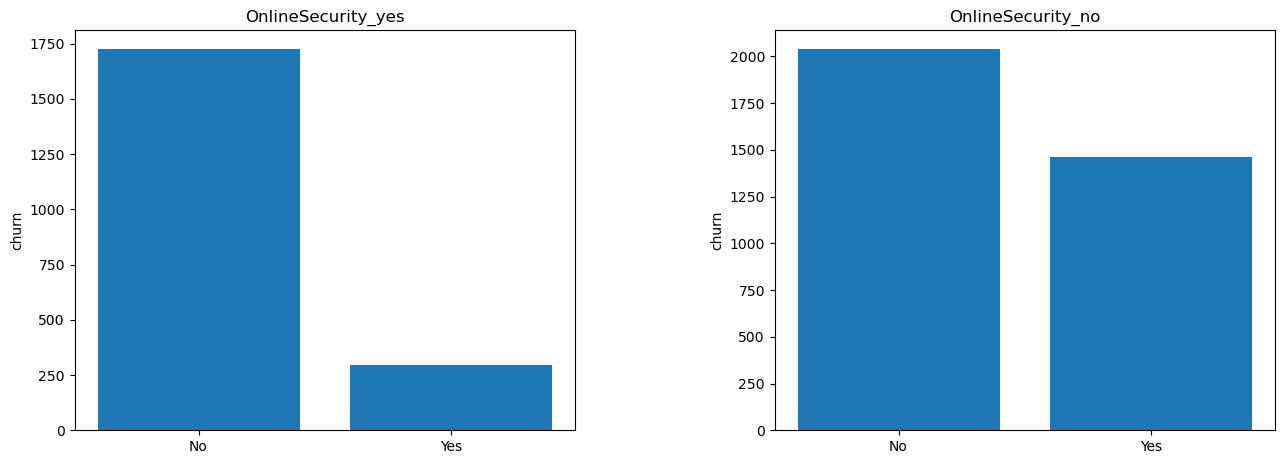

In [86]:
fig1=plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['OnlineSecurity']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('OnlineSecurity_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['OnlineSecurity']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('OnlineSecurity_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


#### Customers opted for Online Security churn less than who have not opted.

### Online Backup

{'No': 1906, 'Yes': 523}
{'No': 1855, 'Yes': 1233}


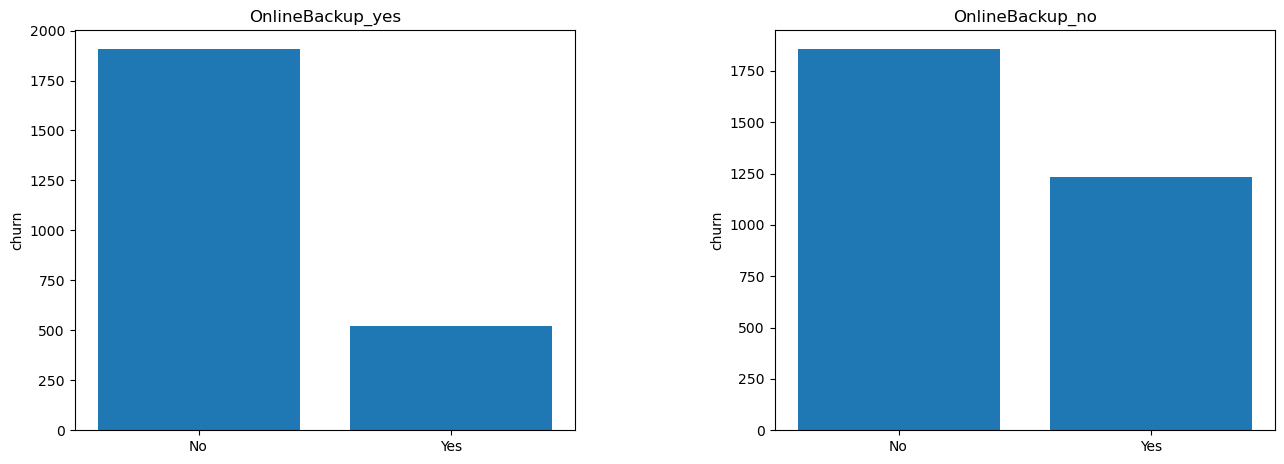

In [87]:
fig1=plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['OnlineBackup']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('OnlineBackup_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['OnlineBackup']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('OnlineBackup_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

#### Customers opted for Online Backup churn less than who have not opted.

### Device Protection

{'No': 1877, 'Yes': 545}
{'No': 1884, 'Yes': 1211}


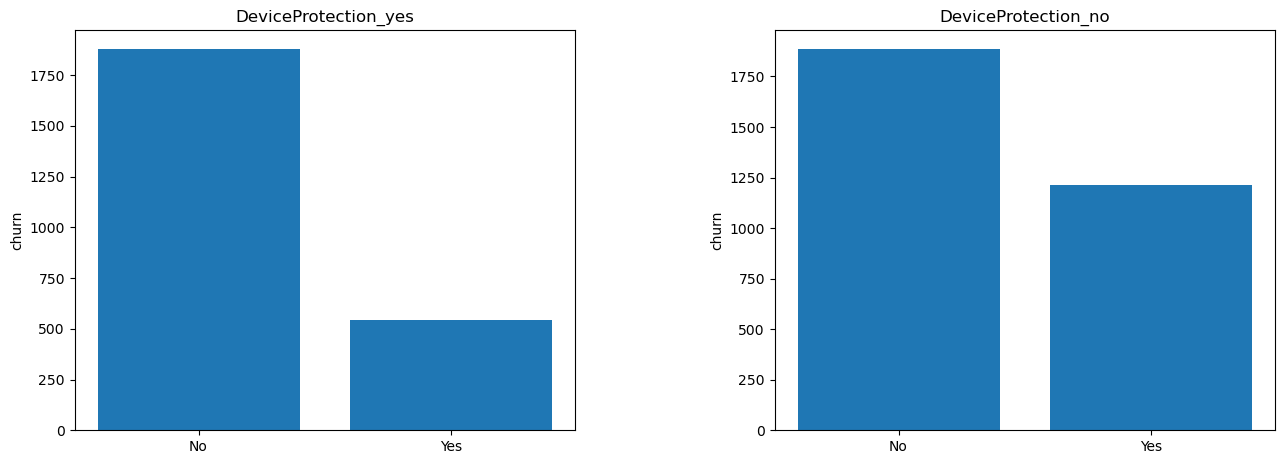

In [88]:
fig1=plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['DeviceProtection']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('DeviceProtection_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['DeviceProtection']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('DeviceProtection_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



#### Customers opted for Device Potection churn less than who have not opted.

### Tech Support

{'No': 1734, 'Yes': 310}
{'No': 2027, 'Yes': 1446}


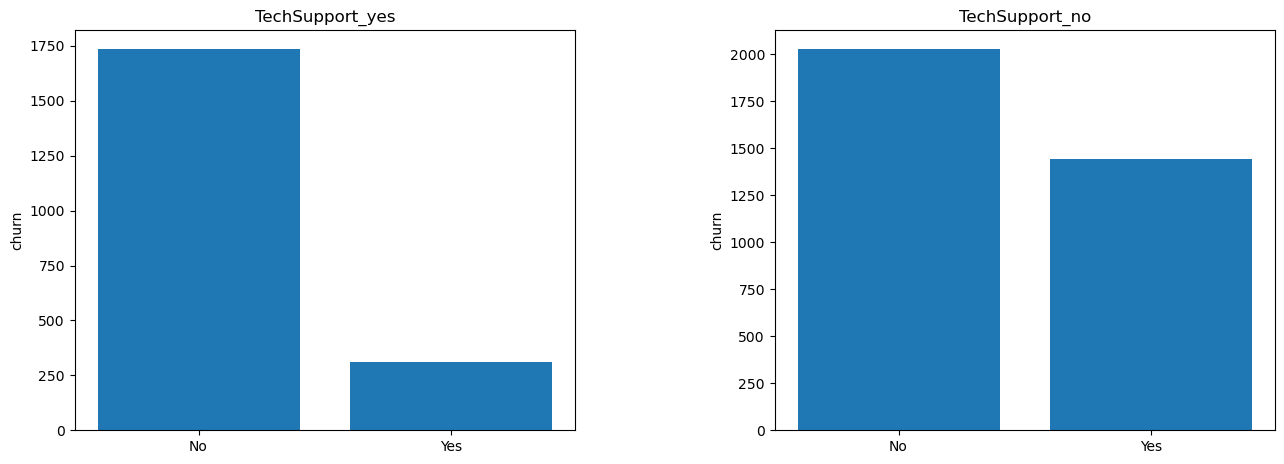

In [89]:
fig1=plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['TechSupport']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('TechSupport_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['TechSupport']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('TechSupport_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



#### Customers opted for Tech Support churn less than who have not opted.

### Streaming TV

{'No': 1893, 'Yes': 814}
{'No': 1868, 'Yes': 942}


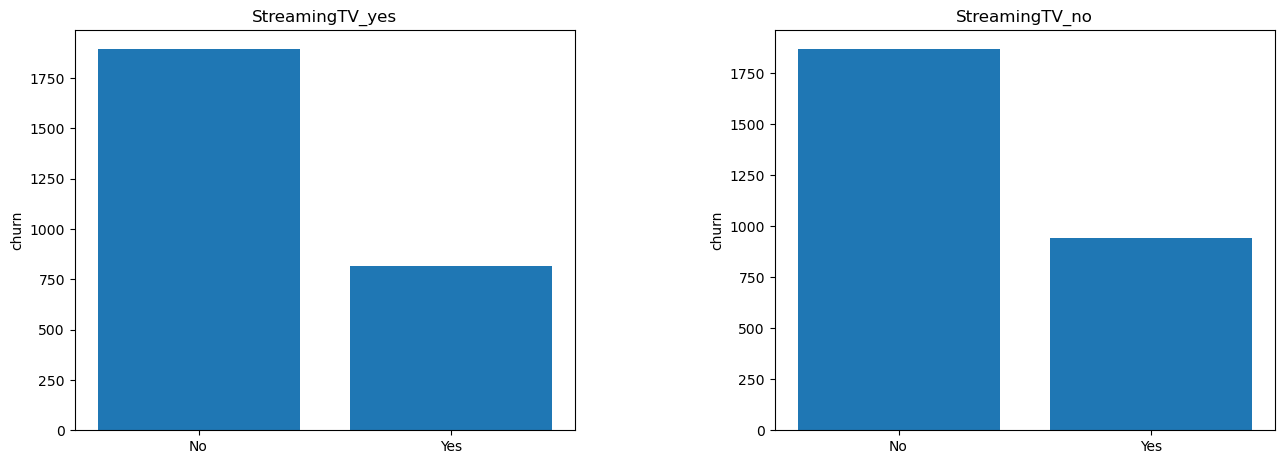

In [90]:
fig1=plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['StreamingTV']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('StreamingTV_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['StreamingTV']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('StreamingTV_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


#### Streaming TV doesn't make such impact on churning.

### Streaming Movies

{'No': 1914, 'Yes': 818}
{'No': 1847, 'Yes': 938}


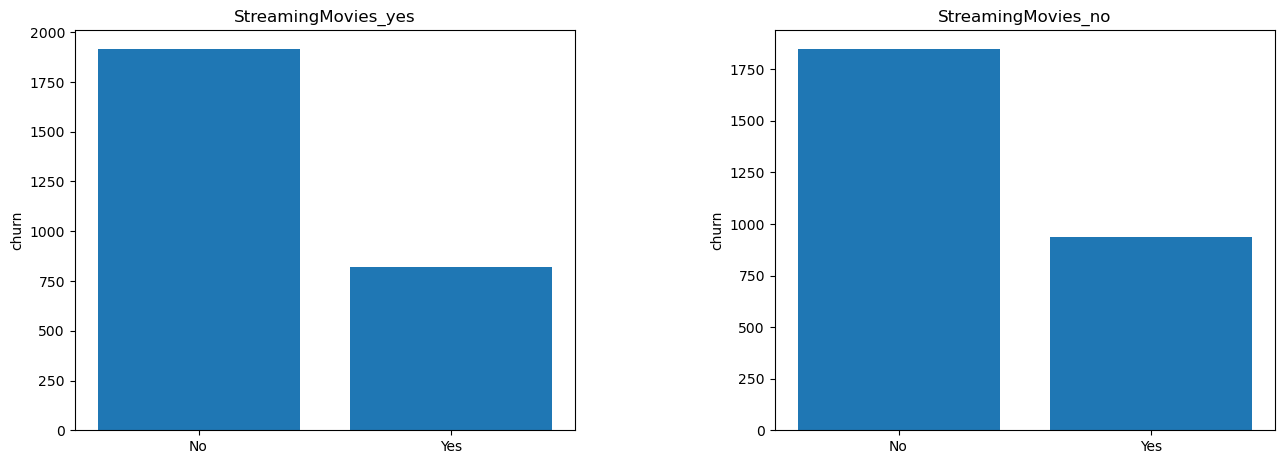

In [91]:
fig1=plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
t=telecom[telecom['StreamingMovies']=='Yes']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('StreamingMovies_yes')

fig1.add_subplot(1,2,2)
t=telecom[telecom['StreamingMovies']=='No']['Churn'].value_counts()
d={t.index[0]:t.values[0],t.index[1]:t.values[1]}
print(d)
plt.bar(list(d.keys()),list(d.values()))
plt.ylabel('churn')
plt.title('StreamingMovies_no')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


#### Streaming Movies doesn't make such impact on churning.